# FINAL PROJECT

### Ezgi Özgen 090180344
### Ali Alperen Usta 090180323

In [1]:
import numpy as np
import pandas as pd
from datetime import date

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, Conv1D, Conv2D,  Embedding, Flatten
import tensorflow_datasets as tfds


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from io import BytesIO
import urllib.request
from scipy.io import loadmat
from scipy.stats import t
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, accuracy_score, hamming_loss, classification_report

from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.layers import Dropout, Dense, GlobalAveragePooling2D, MaxPooling2D
from keras.models import Model
from keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve



# Introduction

In this project, the celeb-a dataset from the TensorFlow library was used to study hair color estimation based on images. So this project is an image classification project. The dataset includes 4 attributes related to hair color, making this a multiclass classification problem. Logistic Regression was used as the baseline model for comparison, and the main models tested were Inception and CNN algorithms. The goal of the project was to accurately predict the hair color of individuals based on their images using these machine learning models. Finally, accuracy, f-score and hamming loss were used to interpret the outputs.


# Methodology 

## CNN

A CNN (Convolutional Neural Network) is a type of artificial neural network that is specifically designed to process data that has a grid-like topology, such as an image. CNNs are particularly useful for image classification and recognition tasks, as they are able to automatically learn hierarchical representations of the visual world. They are composed of multiple layers of interconnected neurons, with each layer learning to recognize patterns in the data. CNN algorithm consists of convolution, pooling and fully connected stages.

### Convolution Layer 

It is responsible for learning and applying filters to the input data in order to extract useful features for the task at hand.  a convolutional layer processes an input image by breaking it down into smaller parts, or feature maps, and then applying a set of filters to each of these parts. The filters are responsible for detecting specific features in the input data, such as edges, corners, and patterns.

### Pooling Layer 

Pooling is a technique to reduce the spatial size of the input data and to extract the most important features from the data. Depending on the chosen pooling type, the activation function reduces the size of the input by performing certain operations on the feature map. The choice of pooling type can depend on the specific requirements of the application and each type has its own strengths and weaknesses. 

### Fully Connected (FC) Layer

The fully connected phase is located at the end of the model. At this stage, all neurons in the previous layer are connected to neurons in current layer.

### Parameters 

At this stage, we will examine the number of parameters in the layers. The number of parameters in a given layer is the number of learnable elements for a filter.

``CONV Layer:`` In this layer, the model learns by calculating the learnable parameters using the width (m), height (n), and filter (d) from the previous layer and the filter (k) in the current layer. The number of parameters in the CONV layer is as follows: ((m * n * d)+1)* k),  added 1 because of the bias term for each filter.

``POOL layer:`` This has got no learnable parameters because all it does is calculate a specific number, no backprop learning involved! Thus number of parameters = 0.

``Fully Connected Layer (FC):`` It is the layer with the most parameters. It is found by processing the number of neurons in the current layer with the neurons in the previous layer.  Thus number of parameters here are: ((current layer neurons c * previous layer neurons p)+1*c).

## InceptionV3


``InceptionV3``is a convolutional neural network (CNN) developed by Google for image classification tasks. It is a variant of the Inception architecture, which was first introduced in the paper "Going Deeper with Convolutions" by Szegedy et al. in 2014.

The InceptionV3 model is designed to be trained on a large dataset, such as the ImageNet dataset, which contains over one million images in 1000 different classes. It is capable of achieving state-of-the-art performance on a number of image classification benchmarks.

The InceptionV3 model is based on the idea of using a combination of different types of convolutional and pooling layers to extract features from images at various scales. It uses a combination of `1x1, 3x3, and 5x5` convolutional filters to capture information at different scales, and also includes a max pooling layer to reduce the spatial dimensions of the input data.

One of the key innovations of the Inception architecture is the use of inception modules, which are blocks of layers that can be stacked on top of each other to form a deep network. These modules use a combination of `1x1, 3x3, and 5x5` convolutional filters to extract features from the input data, and also include a max pooling layer to reduce the spatial dimensions.

The InceptionV3 model also includes a number of additional features, such as batch normalization and the use of rectified linear units (ReLUs) as the activation function, which can help improve the model's performance.

In summary, the InceptionV3 model is a deep CNN that uses a combination of different types of convolutional and pooling layers, as well as inception modules, to extract features from images at various scales. It has achieved state-of-the-art performance on a number of image classification benchmarks, and is widely used for tasks such as object recognition and image classification.




# Experiment

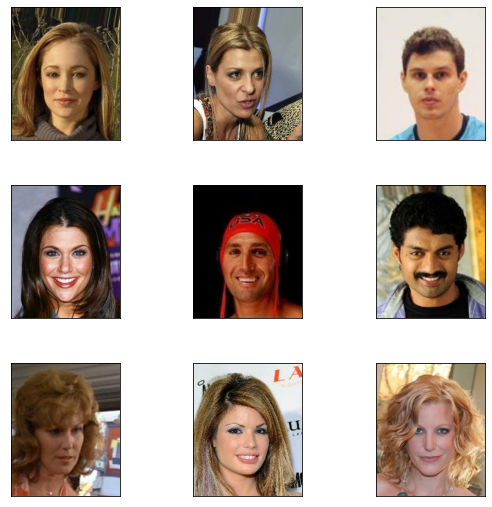

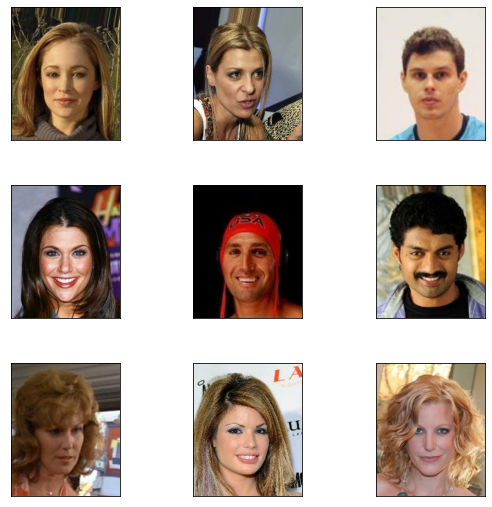

In [2]:
(train, test), info = tfds.load('celeb_a', split=['train','test'], with_info=True, shuffle_files=True)
tfds.show_examples(train,info)

TensorFlow Datasets (tfds) is a collection of publicly available datasets that can be easily loaded into TensorFlow using the tfds.load function. The celeb_a dataset is a large-scale face attributes dataset with more than 200,000 celebrity images, each with 40 attribute annotations.

The `tfds.load` function can be used to load the celeb_a dataset from TensorFlow Datasets into your TensorFlow program. The split argument specifies which portion of the dataset to load, in this case the 'train' and 'test' splits. `The with_info` argument specifies that metadata about the dataset should be returned in addition to the data. The `shuffle_files` argument specifies that the dataset files should be shuffled before being loaded, which can improve randomness and reduce the likelihood of overfitting when training a model.

The `tfds.show_examples` function can be used to display a few examples from the dataset along with their corresponding labels. In this case, the train dataset and the info metadata are passed as arguments to `tfds.show_examples`. This can be useful for getting a sense of the data and verifying that it was loaded correctly.

In [3]:
def tfGetData(df,N,attr1,attr2,attr3,attr4):
    X_train = []
    y_train = []
    fn = {True: 1, False: 0}
    for u in df.take(N):
        X_train.append(u['image'].numpy().reshape((218,178,3)))
        y_train.append(fn.get(u['attributes'][attr1].numpy(),0))
        y_train.append(fn.get(u['attributes'][attr2].numpy(),0))
        y_train.append(fn.get(u['attributes'][attr3].numpy(),0))
        y_train.append(fn.get(u['attributes'][attr4].numpy(),0))
    y_train=np.reshape(y_train, (N,4))    
    return X_train,y_train

This code defines a function `tfGetData` that takes in a TensorFlow Datasets (tfds) Dataset object called df, an integer N, and four strings attr1, attr2, attr3, and attr4. The function returns two lists: X_train and y_train.

The function iterates over the first N examples in the df dataset using the take method. For each example, the function extracts the image data from the image field and appends it to the X_train list as a NumPy array with shape `(218, 178, 3)`.

The function also extracts the values of four attributes from the attributes field, specified by the arguments attr1, attr2, attr3, and attr4. The values of these attributes are stored in a Python dictionary called fn, which maps the values True and False to the integers 1 and 0, respectively. The function uses the get method of the fn dictionary to retrieve the integer value corresponding to the attribute value, and appends it to the y_train list. If the attribute value is not present in the fn dictionary, the default value of 0 is used.

Overall, this function is intended to extract image data and attribute values from the df dataset and store them in the X_train and y_train lists, respectively. These lists can then be used for training a machine learning model.

In [4]:
X_train,y_train = tfGetData(train,4000,'Black_Hair',"Blond_Hair","Brown_Hair","Gray_Hair")
X_test,y_test = tfGetData(test,400,'Black_Hair',"Blond_Hair","Brown_Hair","Gray_Hair")

In [5]:
y_train

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [6]:
y_train[900]

array([0, 0, 0, 0])

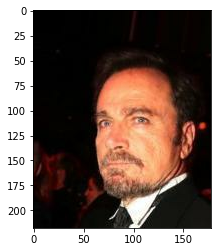

In [7]:
plt.imshow(X_train[900])

In [8]:
image = X_train[900]

In [9]:
dict_number_color={}
def HairColorNumber(y_train,condition,hair):
    
    list = [i for i, x in enumerate(y_train) if (x == condition).all()]
    dict_number_color[hair] = len(list)
    return len(list)
    
print("Number of People has Gray HAIR: ",HairColorNumber(y_train,[0, 0, 0, 1],'Gray'))
print("Number of People has Brown HAIR: ",HairColorNumber(y_train,[0, 0, 1, 0],'Brown'))
print("Number of People has Blonde HAIR: ",HairColorNumber(y_train,[0, 1, 0, 0],'Blonde'))
print("Number of People has Black HAIR: ",HairColorNumber(y_train,[1, 0, 0, 0],'Black'))
print("Number of People has Black And Brown HAIR: ",HairColorNumber(y_train,[1, 0, 1, 0],'Black And Brown'))
print("Number of People has Black And Blonde HAIR: ",HairColorNumber(y_train,[1, 1, 0, 0],'Black and Blonde'))
print("Number of People has Black And Gray HAIR: ",HairColorNumber(y_train,[1, 0, 0, 1],"Black and Gray"))
print("Number of People has Blonde And Gray HAIR: ",HairColorNumber(y_train,[0, 1, 0, 1],"Blonde and Gray"))
print("Number of People has Blonde And Brown HAIR: ",HairColorNumber(y_train,[0, 1, 1, 0],"Blonde and Brown"))
print("Number of People has Brown And Gray HAIR: ",HairColorNumber(y_train,[0, 0, 1, 1],"Brown and Gray"))
print("Number of People not labeled Hair: ",HairColorNumber(y_train,[0, 0, 0, 0],"Unlabeled"))

Number of People has Gray HAIR:  157
Number of People has Brown HAIR:  741
Number of People has Blonde HAIR:  528
Number of People has Black HAIR:  946
Number of People has Black And Brown HAIR:  21
Number of People has Black And Blonde HAIR:  0
Number of People has Black And Gray HAIR:  0
Number of People has Blonde And Gray HAIR:  14
Number of People has Blonde And Brown HAIR:  17
Number of People has Brown And Gray HAIR:  1
Number of People not labeled Hair:  1575


This code defines a NumPy array y_train and a `HairColorNumber` function that takes a list condition of four binary values and a hair array as input. Returns an integer representing the number of rows in the y_train array that match the condition list.

The function first uses a list comprehension to create a list called list containing the indexes of all rows that match the condition list in y_train. The enumeration function returns a tuple containing the index and value of each item in the iteration. The if `(x == condition).all()` condition checks if all elements of the row are equal to the corresponding elements in the condition list.

The function then stores the length of the list under the hair key in a dictionary called dict_number_color and returns the length of the list.

The code then calls the HairColorNumber function multiple times with different lists of conditions and hair arrays to count the number of rows in the y_train array that match each condition. Print statements return the results of these calls.

Generally, the purpose of this code is to count the number of rows with a certain hair color in the y_train array as determined by the values in the condition list and store the numbers in the dict_number_color dictionary. In this way, we can observe and analyze how many hair colors there are. Available in unlabeled data.

In [10]:
dict_number_color.values()

dict_values([157, 741, 528, 946, 21, 0, 0, 14, 17, 1, 1575])

In [11]:
df_celeb = pd.DataFrame(dict_number_color.values(),dict_number_color.keys()).reset_index()
df_celeb.rename(columns = {"index":"Hair Color", df_celeb.columns[1]:"Numbers"},inplace=True)
df_celeb

Hair Color  Numbers
0               Gray      157
1              Brown      741
2             Blonde      528
3              Black      946
4    Black And Brown       21
5   Black and Blonde        0
6     Black and Gray        0
7    Blonde and Gray       14
8   Blonde and Brown       17
9     Brown and Gray        1
10         Unlabeled     1575

In [12]:
fig = px.bar(df_celeb[0:4], x="Hair Color", y="Numbers", color="Numbers", text_auto=True)
fig.show()

fig2 = px.bar(df_celeb[4:10], x="Hair Color", y="Numbers", color="Numbers", text_auto=True)
fig2.show()

These graph create and display two bar charts using the `Plotly Express (px)` library
These lines of code are intended to create and display two bar charts using data from the df_celeb DataFrame. The x-axis of each chart displays the values in the Hair Color column, and the y-axis displays the values in the Numbers column. The bars are colored based on the values in the Numbers column, and the text labels for the bars are generated automatically.The first chart shows the count of images labeled with a single hair color. The second chart displays the count of images labeled with multiple hair colors.

In [13]:
def ShowPeople(condition):
    indices = [i for i, x in enumerate(y_train) if (x == condition).all()]
    x_train_rows = [X_train[i] for i in indices]
    a=0
    for i,x in enumerate(x_train_rows):
        if a<2:
            plt.imshow(x)
            plt.show()
        a+=1

This code defines a function called ShowPeople that takes in a list condition of four binary values as input, and displays a limited number of images from the X_train list. The function first uses a list comprehension to create a list called indices containing the indices of all rows in the y_train array that match the condition list. The enumerate function returns a tuple containing the index and value of each element in an iterable. The if `(x == condition).all()` condition checks if all elements of the row are equal to the corresponding elements in the condition list. The function then creates a new list called x_train_rows using a second list comprehension, which contains the images at the indices in indices from the X_train list. The function then defines a variable a initialized to 0, and iterates over the x_train_rows list using the enumerate function. For each image in the list, the function displays the image using the plt.imshow function from the Matplotlib library. The plt.show function is then called to display the image. In this way, we looked at the photos of the people according to the tags and observed that they were correct. In addition, we set a restriction because there were too many photos. Only two photos are visible.

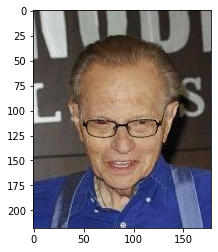

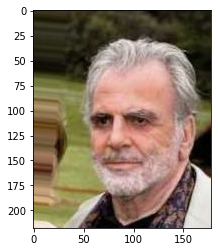

In [14]:
ShowPeople([0,0,0,1])

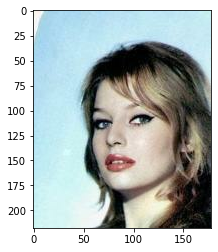

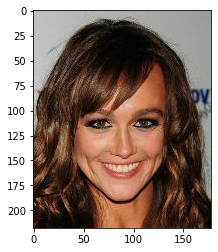

In [15]:
ShowPeople([0, 0, 1, 0])

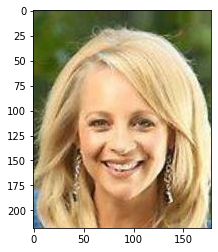

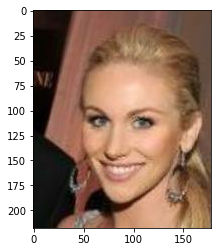

In [16]:
ShowPeople([0, 1, 0, 0])

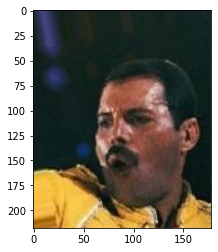

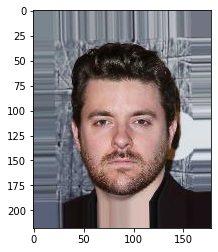

In [17]:
ShowPeople([1, 0, 0, 0])

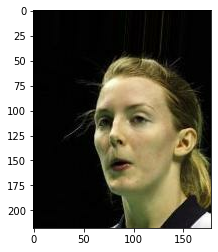

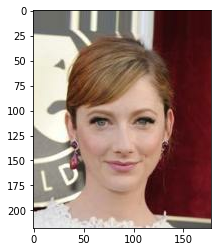

In [18]:
ShowPeople([0, 1, 1, 0])

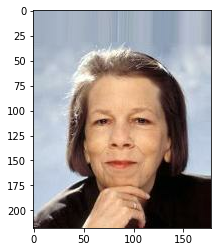

In [19]:
ShowPeople([0, 0, 1, 1])

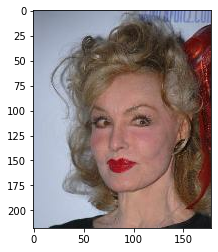

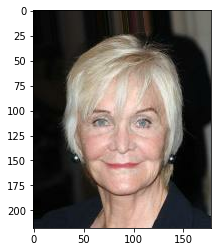

In [20]:
ShowPeople([0, 1, 0, 1])

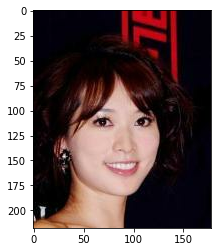

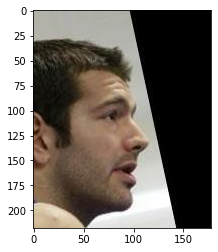

In [21]:
ShowPeople([1, 0, 1, 0])

In [22]:
X_train[0].shape

(218, 178, 3)

In [23]:
len(X_train),len(y_train)

(4000, 4000)

In [150]:
X_train_LR=[]
X_test_LR=[]
for i in X_train :
    X_train_LR.append(np.reshape(i,(218*178*3)))
for i in X_test :
    X_test_LR.append(np.reshape(i,(218*178*3)))     


At this stage, the shapes of the images were changed to use Logistic regression.

In [151]:
len(X_train_LR[0])

116412

In [152]:
X_train_LR[0].shape

(116412,)

In [154]:
X_train_LRR =np.array(X_train_LR)
X_test_LRR =np.array(X_test_LR)

In [156]:
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train_LRR,y_train)
y_pred = model.predict(X_test_LR)


C:\Users\Alperen Usta\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Alperen Usta\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Some algorithms are designed for binary classivation problems. Logistic regression and SVM are examples of such algorithms. This project is a multi-class classification problem. They cannot be used for multi-class classification tasks, at least not directly. One-Vs-Rest method was used to solve this problem. 

One-vs-rest (also known as one-vs-all or OVA) is a method used in machine learning to train classifiers for multiclass classification problems, where the goal is to predict a label from a set of possible labels. It works by training a separate classifier for each label, and each classifier is trained to predict whether a given example belongs to that class or not.



In [158]:
model.score(X_test_LRR,y_test)

0.4525

In [157]:
f1 = f1_score(y_test, y_pred, average='micro')
acc = accuracy_score(y_test, y_pred)
hl = hamming_loss(y_test, y_pred)


print('F1 score of Logistic Regression Model:', f1)
print('Accuracy of Logistic Regression Model::', acc)
print('Hamming loss of Logistic Regression Model::', hl)

F1 score of Logistic Regression Model: 0.46653144016227177
Accuracy of Logistic Regression Model:: 0.4525
Hamming loss of Logistic Regression Model:: 0.164375


Model score, f1-score, accuracy and hamming loss values were checked.

The hamming loss is the number of misclassified data divided by the whole data. It takes a value between 0 and 1. This value is intended to be close to 0.

In [27]:
X_train_1 = np.array(X_train)
X_test_1 = np.array(X_test)

Converting the X_train and X_test lists to NumPy arrays using the np.array function is likely done as a preprocessing step for using the InceptionV3 and CNN model for image classification. Many deep learning models, including InceptionV3, expect input data to be in the form of a NumPy array. By converting the X_train and X_test lists to NumPy arrays, the data can be passed as input to the InceptionV3 model.

In [165]:


inc_model = InceptionV3(weights="imagenet",
                        include_top=False,
                        input_shape=(218, 178, 3))
x = inc_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)

predictions = Dense(4, activation="sigmoid")(x)
# creating the final model 
model_ = Model(inputs=inc_model.input, outputs=predictions)

# compile the model
model_.compile(optimizer="adam", 
               loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='weights.best.inc.male.hdf5', 
                               verbose=1, save_best_only=True)

Model creates a convolutional neural network (CNN) using the InceptionV3 model as a base, and adds additional layers on top of it. The model is then compiled and a ModelCheckpoint object is created to save the model's weights. The InceptionV3 model is imported from the Keras library and is instantiated using the InceptionV3 function. The weights argument is set to "imagenet", which specifies that the model should use weights pretrained on the ImageNet dataset. The include_top argument is set to False, which specifies that the top layers of the model should not be included. The input_shape argument specifies the shape of the input data, which is expected to be a 3D tensor with dimensions 218x178x3. The output of the InceptionV3 model is stored in a variable x. A GlobalAveragePooling2D layer is then added on top of x, which applies global average pooling to the output of the InceptionV3 model. This reduces the output to a single 1D tensor per feature map. The output of the GlobalAveragePooling2D layer is then passed through a series of fully-connected (Dense) layers, each with a specified number of units and an activation function. The Dense layers are connected in sequence, with the output of each layer passed as input to the next. Finally, a Dense layer with 4 units and a softmax activation function is added to the end of the network, and the output of this layer is stored in the predictions variable. This layer is used to predict the probability of each of the four classes.
The model is then compiled using the compile method, which specifies the optimizer, loss function, and metrics to use during training. The adam optimizer and the binary_crossentropy loss function are commonly used for binary classification tasks. The metrics argument specifies that the model's accuracy should be tracked during training.
Finally, a ModelCheckpoint object is created using the ModelCheckpoint function from the Keras library. The filepath argument specifies the path to save the model weights to, and the verbose argument specifies the level of verbosity during training. The save_best_only argument is set to True, which specifies that only the model's best weights should be saved. This can be useful for preventing the model from overfitting to the training data.

In [25]:
model_.fit(X_train,y_train,epochs=15,batch_size=32,verbose=1)

Epoch 1/15
63/63 [==============================] - 422s 6s/step - loss: 0.2595 - accuracy: 0.6350
Epoch 2/15
63/63 [==============================] - 385s 6s/step - loss: 0.2277 - accuracy: 0.6535
Epoch 3/15
63/63 [==============================] - 346s 5s/step - loss: 0.2103 - accuracy: 0.6860
Epoch 4/15
63/63 [==============================] - 332s 5s/step - loss: 0.1943 - accuracy: 0.6670
Epoch 5/15
63/63 [==============================] - 320s 5s/step - loss: 0.1886 - accuracy: 0.6825
Epoch 6/15
63/63 [==============================] - 322s 5s/step - loss: 0.1591 - accuracy: 0.7140
Epoch 7/15
63/63 [==============================] - 321s 5s/step - loss: 0.1472 - accuracy: 0.6870
Epoch 8/15
63/63 [==============================] - 322s 5s/step - loss: 0.1671 - accuracy: 0.7105
Epoch 9/15
63/63 [==============================] - 320s 5s/step - loss: 0.1400 - accuracy: 0.6985
Epoch 10/15
63/63 [==============================] - 321s 5s/step - loss: 0.1270 - accuracy: 0.7165
Epoch 11/

In [27]:
y_pred = model_.predict(X_test).argmax(axis=1)
yy_test = y_test.argmax(axis=1)
res = confusion_matrix(yy_test,y_pred)

7/7 [==============================] - 7s 969ms/step


In [ ]:
y_pred_cnn = (y_pred > 0.5).astype(int)

In [28]:
res

array([[23, 87, 21,  7],
       [ 0, 23,  0,  0],
       [ 0, 19, 13,  0],
       [ 0,  4,  0,  3]], dtype=int64)

In [29]:
print(classification_report(yy_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29       138
           1       0.17      1.00      0.29        23
           2       0.38      0.41      0.39        32
           3       0.30      0.43      0.35         7

    accuracy                           0.31       200
   macro avg       0.46      0.50      0.33       200
weighted avg       0.78      0.31      0.31       200



In [33]:
scorev3 = model_.evaluate(X_test, y_test, verbose=0)

In [34]:
scorev3

[0.777262270450592, 0.3100000023841858]

In [24]:
model1 = Sequential()
model1.add(Conv2D(12, (4,4), activation='softmax', input_shape=(218,178,3))) 
model1.add(Flatten()) # image al vektöre dönüştür.
model1.add(Dense(256, activation='relu')) # 8x8 olduğu için 64 lük vektör. senin dimension arttırman gerekiyor. 
model1.add(Dropout(0.25))
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(4, activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])



In [28]:
model1.fit(X_train_1, y_train,
                  batch_size=50,
                  epochs=15,
                  verbose=1)


Epoch 1/15
80/80 [==============================] - 220s 3s/step - loss: 1.7929 - accuracy: 0.4110
Epoch 2/15
80/80 [==============================] - 166s 2s/step - loss: 0.3918 - accuracy: 0.5350
Epoch 3/15
80/80 [==============================] - 174s 2s/step - loss: 0.3181 - accuracy: 0.5997
Epoch 4/15
80/80 [==============================] - 180s 2s/step - loss: 0.2667 - accuracy: 0.6447
Epoch 5/15
80/80 [==============================] - 164s 2s/step - loss: 0.2205 - accuracy: 0.6700
Epoch 6/15
80/80 [==============================] - 171s 2s/step - loss: 0.1872 - accuracy: 0.6975
Epoch 7/15
80/80 [==============================] - 167s 2s/step - loss: 0.1425 - accuracy: 0.7113
Epoch 8/15
80/80 [==============================] - 173s 2s/step - loss: 0.1213 - accuracy: 0.7188
Epoch 9/15
80/80 [==============================] - 156s 2s/step - loss: 0.0943 - accuracy: 0.7207
Epoch 10/15
80/80 [==============================] - 158s 2s/step - loss: 0.0883 - accuracy: 0.7247
Epoch 11/

The first layer is a Conv2D layer with 12 filters of size 4x4. This layer applies convolutional filters to the input data, effectively learning to detect features in the input images. The activation parameter specifies the activation function to use after the convolutional operation. In this case, the activation function is 'softmax', which scales the output of the layer so that all of the values are between 0 and 1 and the sum of the values is 1. This is often used as the activation function for the final layer of a classification model because it allows the model to output a probability for each class.

The second layer is a Flatten layer, which flattens the output of the Conv2D layer into a 1D vector. This is necessary because the next layer is a fully-connected (Dense) layer, which expects a 1D input.

The third layer is a Dense layer with 256 units and the 'relu' activation function. This layer learns to combine the features learned by the Conv2D layer in a meaningful way.

The fourth layer is a Dropout layer with a rate of 0.25. This layer randomly sets a fraction of the input units to 0 at each update during training, which helps prevent overfitting by forcing the model to learn multiple independent representations of the same data.

The fifth layer is another Dense layer with 128 units and the 'relu' activation function.

The final layer is a Dense layer with 4 units and the 'sigmoid' activation function. This is the output layer of the model, and it will produce a probability for each of the 4 classes.

Finally, the model is compiled using the 'binary_crossentropy' loss function and the 'adamax' optimization algorithm, and the 'accuracy' metric is specified for evaluating the model. The loss function and optimization algorithm are used to train the model, and the metric is used to evaluate the model's performance.




Some filters tried in conv layer are as follows;

1-) model1.add(Conv2D(6, (2,2), activation='softmax', input_shape=(218,178,3)))

2-) model1.add(Conv2D(4, (4,4), activation='softmax', input_shape=(218,178,3))) 

3-) model1.add(Conv2D(12, (4,4), activation='softmax', input_shape=(218,178,3))) 



In [29]:
y_pred_cnn = model1.predict(X_test_1)

13/13 [==============================] - 4s 207ms/step


In [31]:
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)

At this stage, we have finalized our predictions by converting the values that come in the form of floats to integers.

In [32]:
score = model1.evaluate(X_test_1, y_test, verbose=0)

In neural network models, the evalueate function is used to examine the model outputs. The accuracy and loss values of the model were examined over the test data.

In [33]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4067542254924774
Test accuracy: 0.5924999713897705


In [34]:
f1_cnn = f1_score(y_test, y_pred_cnn, average='micro')

print('F1 score:', f1_cnn)

F1 score: 0.4252873563218391


In [35]:
y_pred_cnn

array([[0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [40]:
y_pred_c = model1.predict(X_test_1).argmax(axis=1)
yy_test = y_test.argmax(axis=1)
res = confusion_matrix(yy_test,y_pred_c)

13/13 [==============================] - 3s 201ms/step


In [41]:
res

array([[147,  20,  85,  24],
       [  2,  32,   8,   1],
       [ 12,   5,  51,   0],
       [  2,   4,   0,   7]], dtype=int64)

In [43]:
print(classification_report(yy_test,y_pred_c))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67       276
           1       0.52      0.74      0.62        43
           2       0.35      0.75      0.48        68
           3       0.22      0.54      0.31        13

    accuracy                           0.59       400
   macro avg       0.50      0.64      0.52       400
weighted avg       0.75      0.59      0.62       400



## Analysis 



### Logistic Regression

We encountered an error due to a multilabel classification problem when using logistic regression. As a result, we explored other options. We also tried using the multinomial parameter within the logistic regression, but this did not work. Therefore, we implemented the one-vs-rest method.

Upon examining the results, the model score was 0.45, indicating that the logistic regression model was not successful. Other error metrics are: 

**F1 score of Logistic Regression Model:** 0.46653144016227177

**Accuracy of Logistic Regression Model:** 0.4525

**Hamming loss of Logistic Regression Model:** 0.164375

According to the results, the f1-score and accuracy were not successful. However, the rate of incorrectly predicted classes in the hamming loss was not high.

### CNN 

Several models were tried when setting up the CNN algorithm. Their results are as follows;

1-) model1.add(Conv2D(6, (2,2), activation='softmax', input_shape=(218,178,3))) --> Accuracy on the last epoch is 0.60.

2-) model1.add(Conv2D(4, (4,4), activation='softmax', input_shape=(218,178,3))) --> Accuracy on the last epoch is 0.63.

3-) model1.add(Conv2D(12, (4,4), activation='softmax', input_shape=(218,178,3)))  --> Accuracy on the last epoch is 0.74.

As a result, the layer written in the 3rd row was used. Model outputs are as follows.

**Test loss:**  0.4067542254924774

**Test accuracy:** 0.5924999713897705

When the model results were examined, the accuracy was 0.57. It can be said that CNN works better than Logistic regression.

### Confusion Matrix

The first row of this confusion matrix is [147, 20, 85, 24]. This shows that there were 147 correct predictions of the 0 label, 20 incorrect predictions of the 0 label, 85 predictions of the 0 label as the 1 label, and 24 predictions of the 0 label as the 3 label. This confusion matrix shows that the model's performance is moderate, with a higher rate of correct predictions for the 0 label, but lower rates of correct predictions for the other labels.


### Classification Report 

this classification report shows that the performance of the model is generally moderate, with sensitivity and sensitivity values higher for labels 0, 1 and 2, but lower for labels 3. This indicates that the model is less likely to correctly predict the 3 labels.



### INCEPTIONV3

In two models tested on the Inceptionv3 architecture, one had a softmax activation function in the output layer and the other had a sigmoid activation function. The model with the sigmoid activation function performed better, so it was continued with that model.


**Test loss**: 0.3100000023841858

**Test accuracy**: 0.777262270450592

**Confusion Matrix**

The number 23 in the first row and first column indicates that the model correctly predicted 23 samples as belonging to class 0. The number 87 in the first row and second column indicates that the model incorrectly predicted 87 samples as belonging to class 1 instead of class 0.
This confusion matrix suggests that the model is having difficulty making correct predictions, especially for class 1, as many samples are being misclassified as belonging to other classes. The model also seems to be having some difficulty distinguishing between classes 2 and 3. Improving the model's performance may involve using more or better quality training data, trying different model architectures or hyperparameter settings, or using techniques such as feature engineering or data preprocessing.

Looking Classification Report the model seems to perform poorly, as the overall accuracy is only 31%. The precision, recall, and F1-score for each class are also low, indicating that the model is not making accurate predictions for any of the classes. This could be due to a variety of factors, such as an insufficient amount of training data, poor model selection

## Conclusion

Based on the information provided, it appears that the CNN model with 12 filters and a kernel size of (4,4) performed the best, with an accuracy of 0.74 on the training data and an accuracy of 0.59 on the test data. The Inceptionv3 model with a sigmoid activation function in the output layer had a higher test accuracy of 0.78, but the overall performance of this model seems to be weaker, as indicated by the low values for precision, recall, and F1-score in the classification report.

There could be a number of reasons why the CNN model performed better than the Inceptionv3 model in this case. It is possible that the CNN model was a better fit for the particular dataset used, or that the hyperparameter settings for the CNN model were more optimal. It is also possible that the Inceptionv3 model was overfitting to the training data, resulting in poor generalization to the test data. Further analysis and experimentation may be necessary to determine the specific cause of the difference in performance between the two models.